<a href="https://colab.research.google.com/github/Swathi12499/DataAnalytics/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
USA_Housing = pd.read_csv('USA_Housing.csv')
USA_Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [0]:
admission_predict=pd.read_csv('Admission_Predict.csv')
admission_predict.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


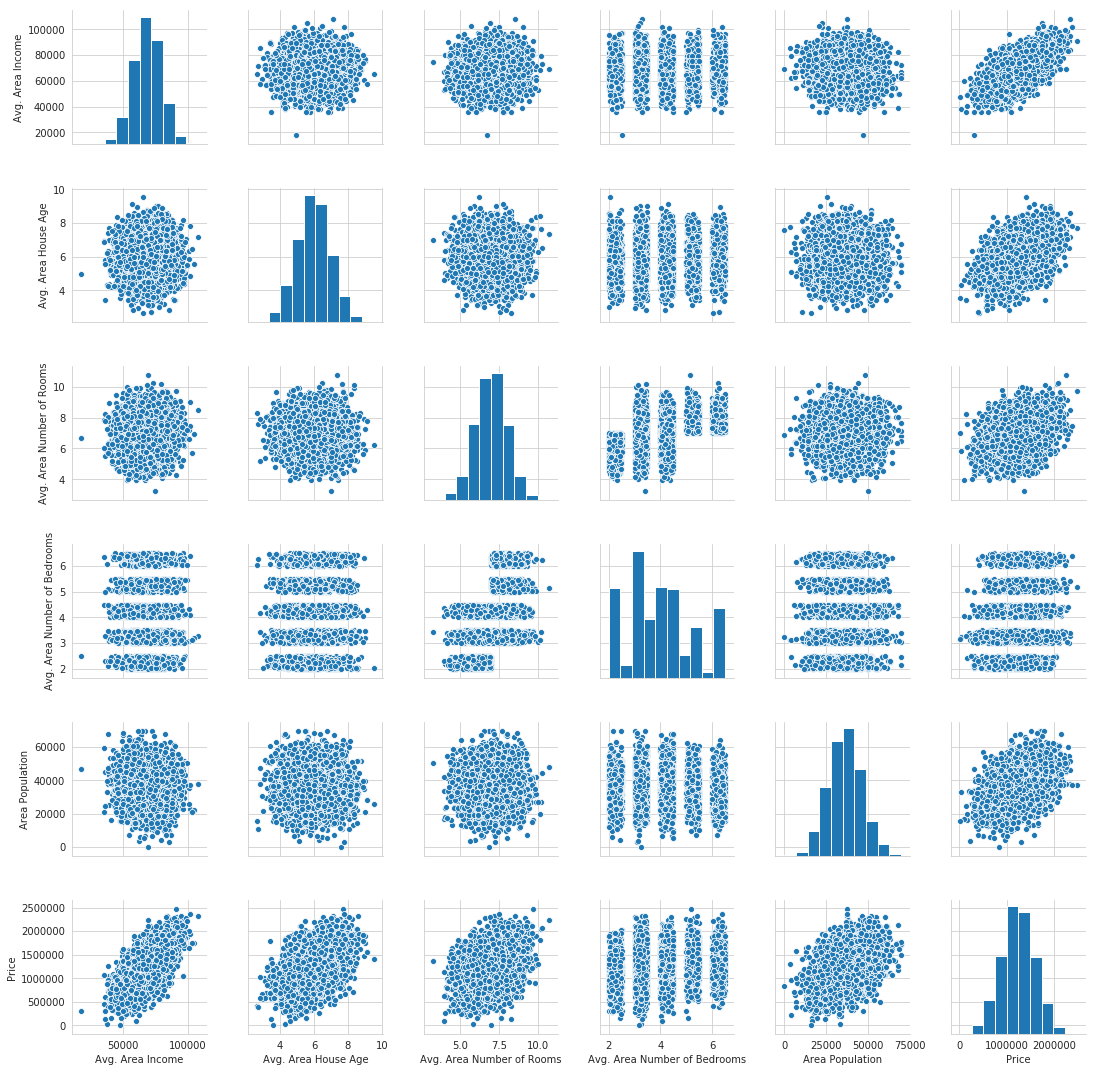

In [0]:
sns.pairplot(USA_Housing)

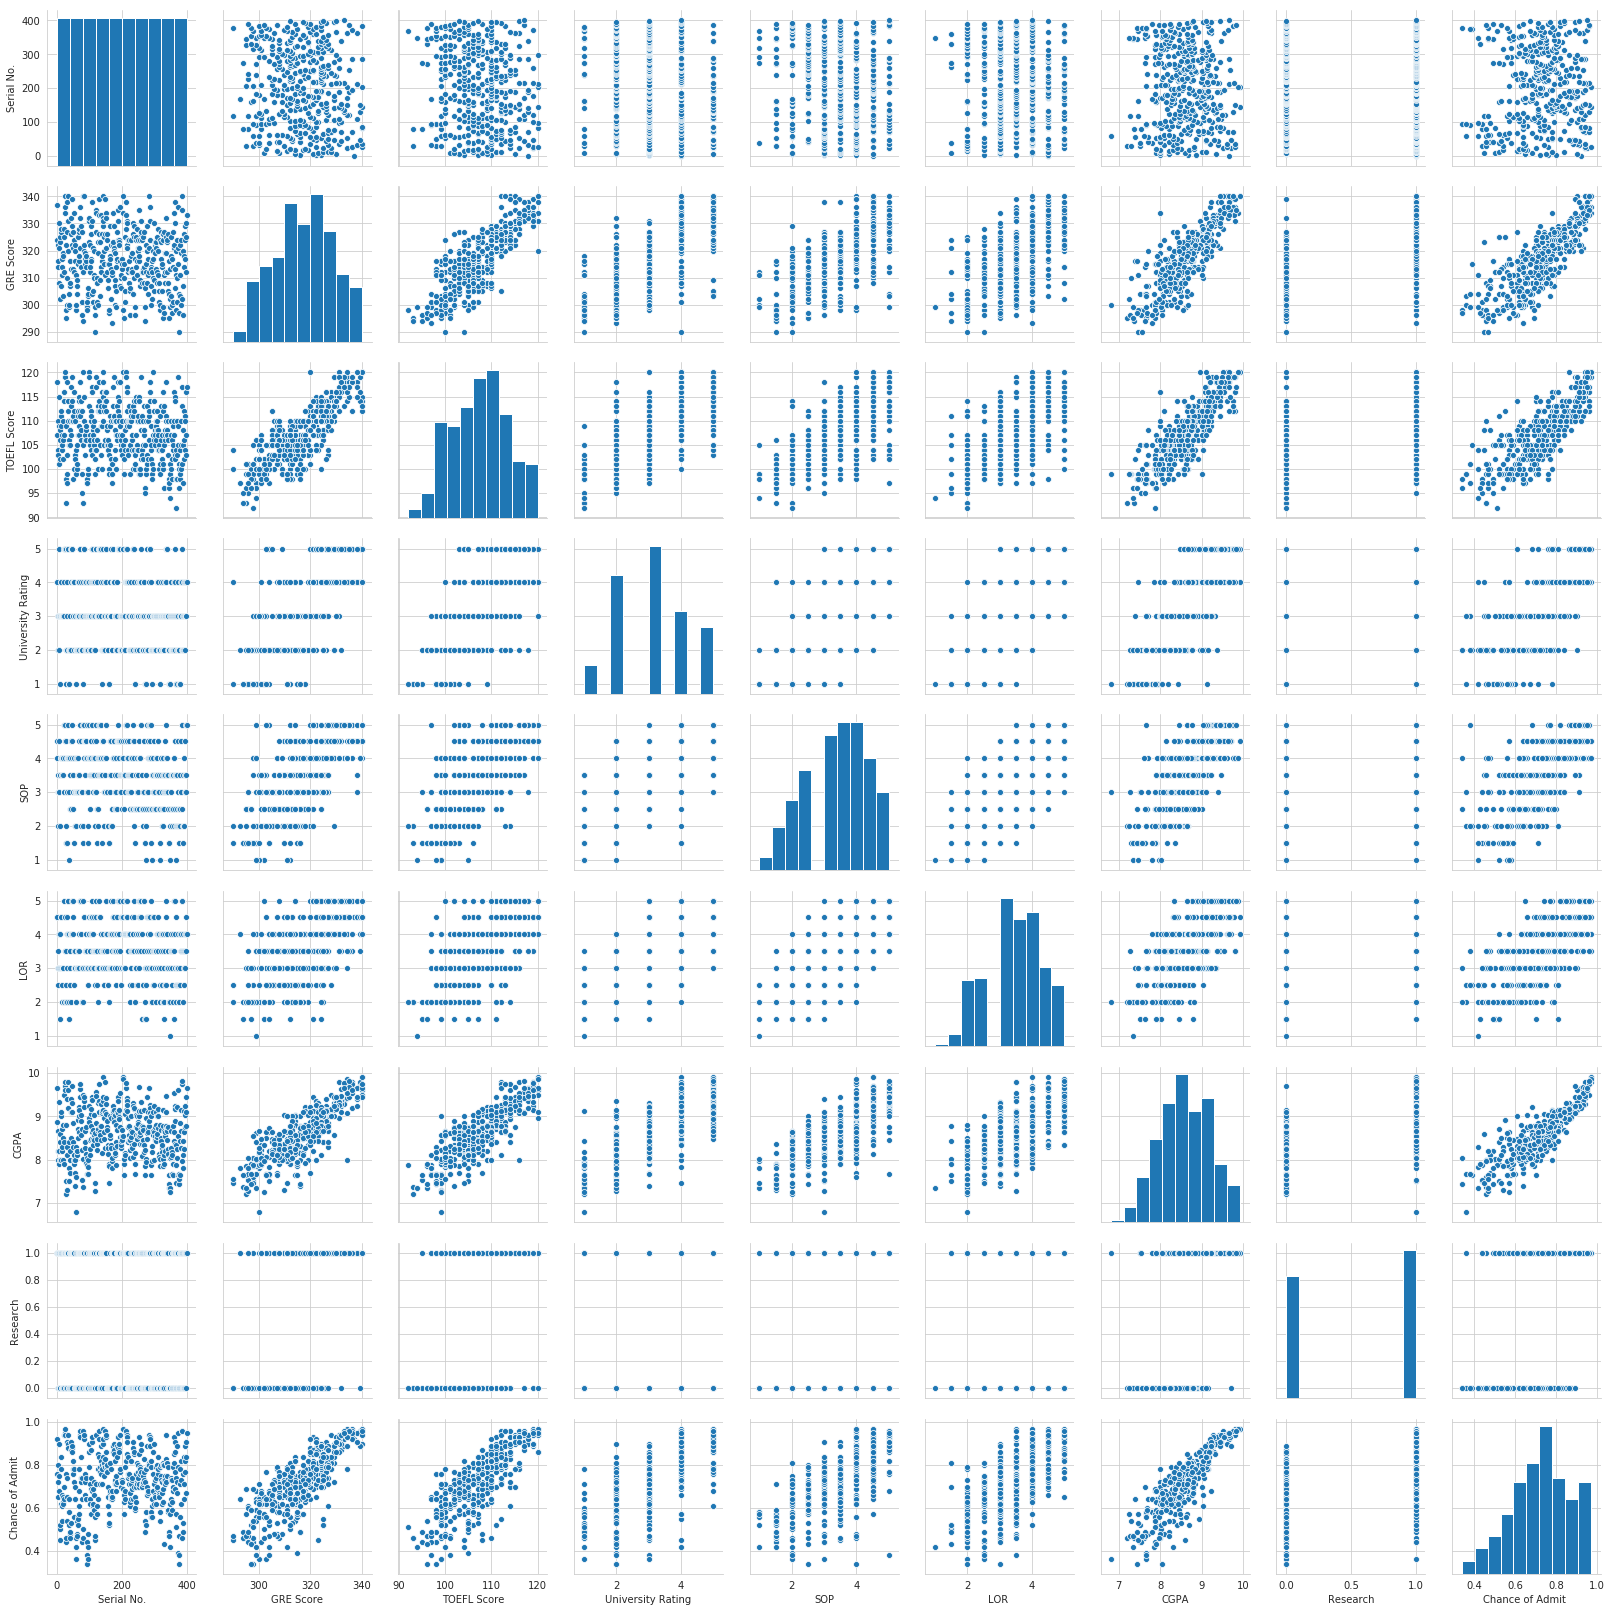

In [0]:
sns.pairplot(admission_predict)

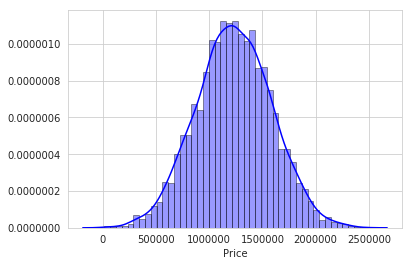

In [0]:
sns.distplot(USA_Housing['Price'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [0]:
USA_Housing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


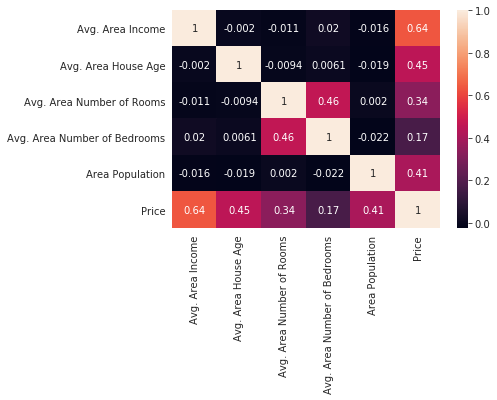

In [0]:
sns.heatmap(USA_Housing.corr(), annot = True)

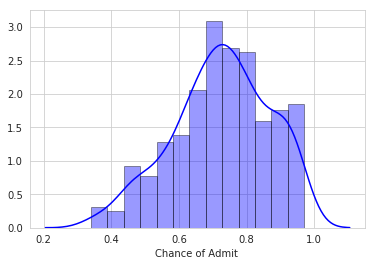

In [0]:
sns.distplot(admission_predict['Chance of Admit '],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [0]:
admission_predict.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


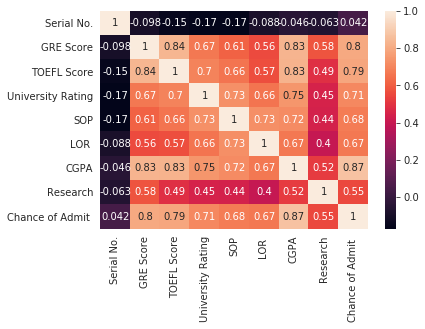

In [0]:
sns.heatmap(admission_predict.corr(), annot = True)

In [0]:
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
Y = USA_Housing['Price']

x= admission_predict[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y= admission_predict['Chance of Admit ']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
linear_m=LinearRegression()
linear_m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(lm.intercept_)

-2640159.796813771


In [0]:
print(linear_m.intercept_)

-1.3601631487972525


In [0]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678023
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [0]:
coeff_dif = pd.DataFrame(linear_m.coef_, x.columns, columns=['Coefficient'])
coeff_dif

,Coefficient
GRE Score,0.002146
TOEFL Score,0.003248
University Rating,0.012512
SOP,-0.001256
LOR,0.017466
CGPA,0.111145
Research,0.011281


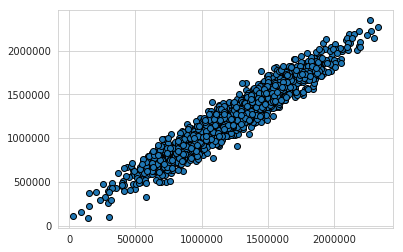

In [0]:
predictions = lm.predict(X_test)
plt.scatter(Y_test, predictions, edgecolor='black')

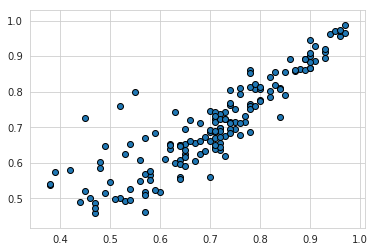

In [0]:
prediction_chance = linear_m.predict(x_test)
plt.scatter(y_test, prediction_chance, edgecolor='black')

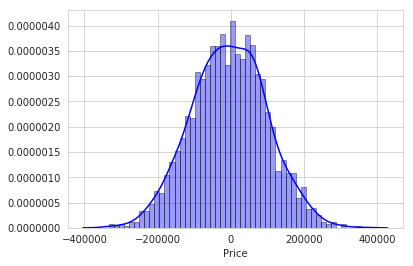

In [0]:
sns.distplot((Y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

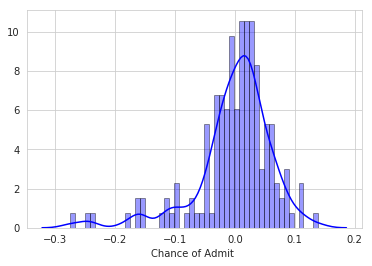

In [0]:
sns.distplot((y_test - prediction_chance), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [0]:
from sklearn import metrics

In [0]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 82288.2225072179
MSE: 10460958905.774704
RMSE: 102278.82921589738


In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_chance))
print('MSE:', metrics.mean_squared_error(y_test, prediction_chance))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_chance)))

MAE: 0.044882180156518195
MSE: 0.004200044094253383
RMSE: 0.06480774717773627
